# **Harnessing Neural Networks for Predicting Diabetes in Pima Indian Females**

## **Objective:**

The objective of this analysis is to employ Neural Network (NN) algorithms to predict diabetes in Pima Indian females using the provided dataset. Our aim is to develop a robust and accurate predictive model that classifies individuals as either positive or negative for diabetes based on the available numeric-valued attributes. By leveraging the power of NN modeling, we seek to unlock the potential of this advanced machine learning technique in identifying potential cases of diabetes in this specific population.

## **Libraries**:

 pandas, scikit-learn, numPy, matplolib, seaborn

In [1085]:
# Import required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset:**

The dataset used in this analysis, the "Pima Indians Diabetes Database," was sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset consists of 768 instances of Pima Indian females, residing near Phoenix, Arizona, USA. The data collection method and timeframe are not specified.  Pima Indians Diabetes Database: https://www.openml.org/d/37



In [1086]:
# Load diabetes dataset from OpenML
from sklearn.datasets import fetch_openml
diabetes = fetch_openml(name='diabetes',  as_frame=True)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [1087]:
# Details about the dataset
print(diabetes.details)

{'id': '37', 'name': 'diabetes', 'version': '1', 'description_version': '1', 'format': 'ARFF', 'creator': 'Peter D. Turney', 'collection_date': '1995-03-01', 'upload_date': '2014-04-06T23:22:13', 'language': 'English', 'licence': 'Public', 'url': 'https://api.openml.org/data/v1/download/37/diabetes.arff', 'parquet_url': 'http://openml1.win.tue.nl/dataset37/dataset_37.pq', 'file_id': '37', 'default_target_attribute': 'class', 'version_label': '1', 'citation': 'https://www.jair.org/index.php/jair/article/view/10129', 'tag': ['mythbusting_1', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_135', 'study_14', 'study_15', 'study_20', 'study_29', 'study_30', 'study_34', 'study_37', 'study_41', 'study_52', 'study_7', 'study_70', 'study_98', 'study_99', 'uci'], 'visibility': 'public', 'original_data_url': 'https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes', 'paper_url': 'https://www.jair.org/index.php/jair/article/view/10129', 'minio_url': 'http://openml1.win.tue.nl/datas

## **Exploratory Data Anaslyis (EDA):**

Performing exploratory analysis on this dataset would involve examining the distributions and relationships of these key variables to gain insights into their characteristics and potential impact on diabetes prediction.

In [1088]:
# Display columns (variables)
list(diabetes.frame.columns)

['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']

In [1089]:
# Display the first five rows of the dataset
print(diabetes.frame.head())

   preg   plas  pres  skin   insu  mass   pedi   age            class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  tested_positive
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  tested_negative
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  tested_positive
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  tested_negative
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  tested_positive


In [1090]:
# Dataset columns and variable type
print(diabetes.frame.dtypes)

preg      float64
plas      float64
pres      float64
skin      float64
insu      float64
mass      float64
pedi      float64
age       float64
class    category
dtype: object


In [1091]:
# How many rows and columns does the dataset has?
print(diabetes.frame.shape)

(768, 9)


In [1092]:
# Number of instances for 'tested_positive' & 'tested_negative'
print(diabetes.frame.groupby("class").size())

class
tested_negative    500
tested_positive    268
dtype: int64


In [1093]:
# Calculating proportion percentage for tested_negative

proportion_tested_negative = 500 / 768
percentage_tested_negative = proportion_tested_negative * 100

print(f"Proportion of tested_negative: {proportion_tested_negative:.2f}")
print(f"Percentage of tested_negative: {percentage_tested_negative:.2f}%")


Proportion of tested_negative: 0.65
Percentage of tested_negative: 65.10%


In [1094]:
# Calculating proportion percentage for tested positive

proportion_tested_positive = 268 / 768
percentage_tested_positive = proportion_tested_positive * 100

print(f"Proportion of tested_positive: {proportion_tested_positive:.2f}")
print(f"Percentage of tested_positive: {percentage_tested_positive:.2f}%")


Proportion of tested_positive: 0.35
Percentage of tested_positive: 34.90%


In [1095]:
# Descriptive statistics on the dataset
print(diabetes.frame.describe())

             preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age  
count  768.000000  768.000000  
mean     0.471876   33.240885  
std      0.331329   11.760232  
min      0.078000   21.000000  
25%      0.243750   24.000000  
50%      0.372500   29.000000  
75%      0.626250   41.000000  
max      2.420

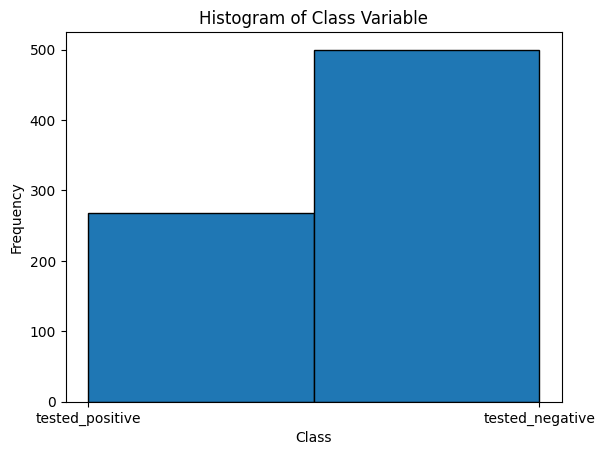

In [1096]:
# Plotting a histogram for 'Class' variable
plt.hist(diabetes.frame['class'], bins=2, edgecolor='black')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Class Variable')

# Displaying the histogram
plt.show()

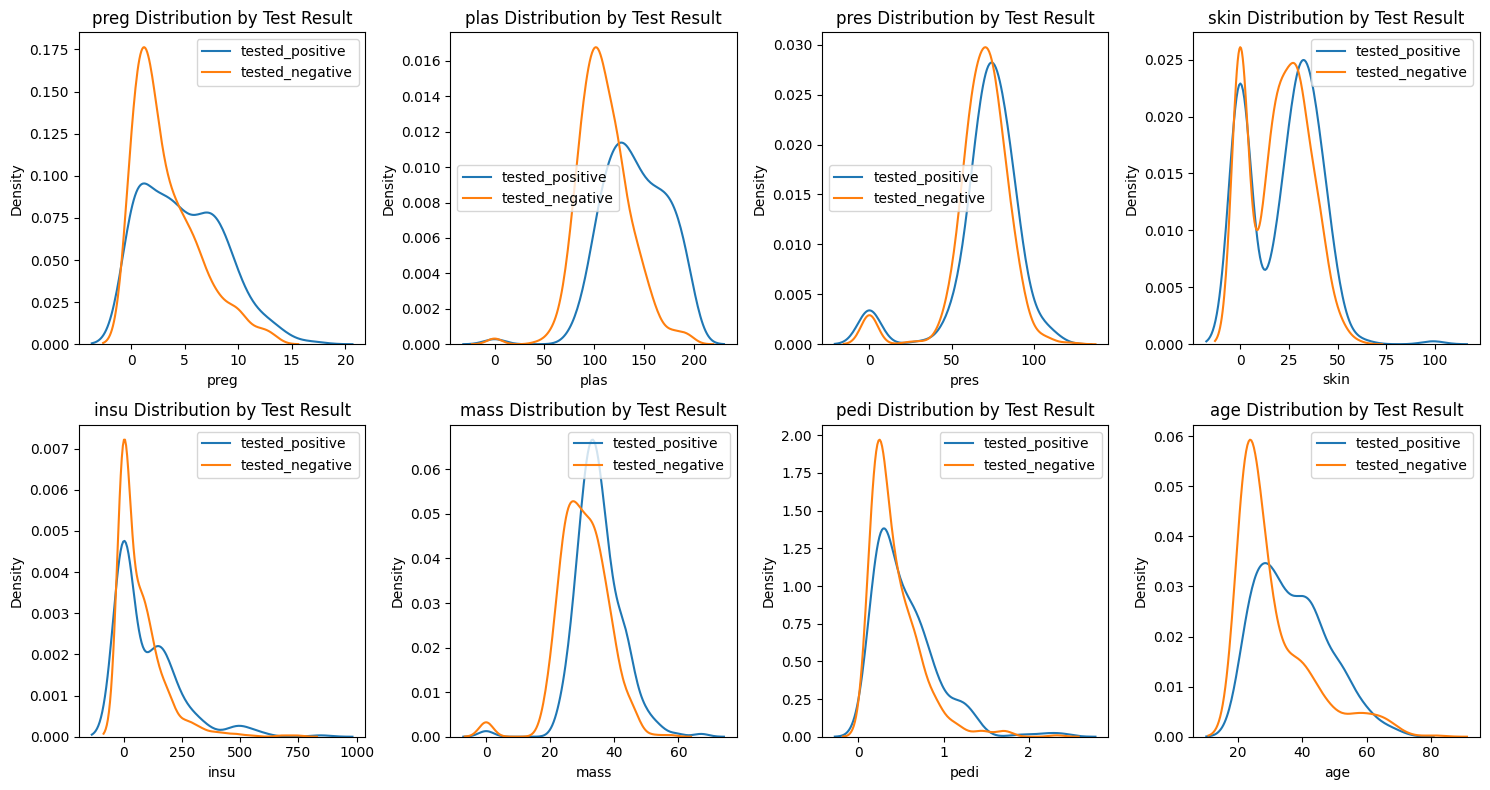

In [1097]:
# Plotting density curves for each variable

features = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
tested_positive = 'tested_positive'
tested_negative = 'tested_negative'

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.kdeplot(diabetes.frame[diabetes.frame['class'] == tested_positive][feature], label=tested_positive, ax=ax)
    sns.kdeplot(diabetes.frame[diabetes.frame['class'] == tested_negative][feature], label=tested_negative, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'{feature} Distribution by Test Result')
    ax.legend()

# Displaying the plots

plt.tight_layout()
plt.show()


# **EDA Observations:**

 1. The proportion of 'tested_positive' is 34.9% and the proportion of 'tested_negative' is 65.1%, suggests an imbalance in the data distribution. In this case, the data is skewed towards the 'tested_negative' category, as it represents a significantly higher proportion compared to the 'tested_positive' category.

2. When dealing with imbalanced data, it can have implications on the performance and accuracy of certain machine learning models. Models trained on imbalanced data might have a bias towards the majority class (in this case, 'tested_negative') and struggle to accurately predict the minority class ('tested_positive').

3. From the eight density plots, we can observe varying degrees of separation and overlapping between the curves. While the separation is not extremely distinct or well-defined, there are noticeable regions where the curves diverge and show little to no overlap. These regions indicate potential associations between certain feature values and a higher likelihood of having diabetes. Features such as age, preg, plasma, and mass appear to exhibit clearer separation in the density plots, suggesting they may hold predictive value for diabetes. However, it's important to conduct further analysis and modeling to assess the true predictive power and significance of these features in relation to diabetes diagnosis.

# **Preprocessing:**

Data Preparation:
1. Imported the model from sklearn to split the data into training and testing sets.
2. Identified the target column and predictors.
3. Standardized the predictors by dividing them by their maximum value.
4. Checked and handled missing values by dropping rows containing NA values.
5. Defined the X and y features, representing the input features and output variable respectively.

Categorical Data Handling:
1. Utilized LabelEncoder from sklearn.preprocessing to encode the categorical output variable 'class' into numerical values.

Data Split:
1. Split the data into training and test sets using the train_test_split function from sklearn.model_selection.

These steps ensured that the data was properly prepared for further analysis and model training.


In [1098]:
# Import model to divide data into training and testing sets
from sklearn.model_selection import train_test_split

In [1099]:
# Define the target column 'class'
target_column = ['class']

# Derive the list of predictor column id's
predictors = list(set(list(diabetes.frame.columns))-set(target_column))

# Standardize the predictors by dividing by the maximum
diabetes.frame[predictors] = diabetes.frame[predictors]/diabetes.frame[predictors].max()

# Provide summary statistics for the dataframe
diabetes.frame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
plas,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
pres,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
skin,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
insu,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
mass,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
pedi,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0


In [1100]:
# Check  if there are missing values
print(diabetes.frame.isnull().any().any())

False


In [1101]:
# Get rid of any rown with NA's
diabetes.frame = diabetes.frame.dropna()

In [1102]:
# Defining X and y features

# The input data
X = diabetes.frame[predictors].values

# The output data
y = diabetes.frame[target_column].values

In [1103]:
# Transforming categorical variable "class" to a continuous variable
from sklearn import preprocessing

# Create an instance of LabelEncoder
le = preprocessing.LabelEncoder()

# Fit and transform the target variable
y_encoded = le.fit_transform(y)

# Print the transformed values
print(y_encoded[0:5])

[1 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1104]:
# Divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


# **Model Fitting:**
Model Fitting: To fit the MLP (Multi-Layer Perceptron) model and perform training, I followed these key steps:

1. Importing the necessary libraries: I imported the MLPClassifier from the sklearn.neural_network module, which provides the implementation of the neural network model.

2. Creating the MLP model: An instance of MLPClassifier is initialized using the parameter values from the example code provided. However, I further performed parameter tuning by experimenting with different values for the following parameters in the MLPClassifier model:

> * **hidden_layer_sizes**: I explored various configurations for the number of nodes in each hidden layer, such as (20, 20, 20) as in the example code, as well as different combinations like (10, 10, 10) or (50, 50). This allowed me to assess the impact of different network architectures on the model's performance.
> * **activation**: I tested different activation functions, including 'relu', 'sigmoid', and 'tanh', to evaluate their influence on the model's ability to capture nonlinearity in the data.
> * **solver**: I experimented with different solvers, such as 'adam', 'sgd', and 'lbfgs', to find the optimal optimization algorithm for training the neural network. Each solver has unique characteristics that can affect the model's convergence and performance.
> * **max_iter**: I adjusted the maximum number of iterations or epochs for training, exploring values like 1000 or 5000, to determine the optimal training duration for achieving convergence.
> * **max_fun**: Through experimentation, I determined the optimal number of function evaluations allowed during optimization. This parameter is crucial for algorithms like 'lbfgs' that rely on function evaluations. I adjusted the max_fun value (e.g., 1000 or 5000) to strike a balance between computational cost and convergence.
>* **alpha**: I explored the impact of the alpha parameter on regularization strength. By trying different values (e.g., 0.001, 0.01, or 0.1), I found the right balance between preventing overfitting and closely fitting the training data. I evaluated the model's performance using validation data and cross-validation techniques.


3. Fitting the model: I trained the MLP model on the training data (X_train and y_train) using the fit() function. During this process, the model adjusted its internal parameters (weights and biases) to minimize the prediction error and improve performance.

4. Making predictions: After fitting the model, I used the trained MLP model to make predictions on both the training set and the test set. This was done by calling the predict() function and passing in the respective feature data (X_train and X_test).

By using the MLPClassifier with the specified architecture and parameters (e.g., activation function, solver, and maximum number of iterations), I aimed to train a neural network model that can effectively learn the underlying patterns in the data and make accurate predictions. The model was trained using the training set and evaluated on the test set to assess its performance and generalization ability.

In [1105]:
# Import the neural network (aka multi-layer-perceptron library)
from sklearn.neural_network import MLPClassifier

# The network architecture will consist of 1 input layer that has as many input nodes as columns-1, 2 hidden layers of 50 nodes each,
# and an output layer with a node for each of the categories--and the network will choose the one with the highest score

mlp = MLPClassifier(hidden_layer_sizes=(50,50), activation='relu', solver='adam', max_iter=5000)

# Train the network
mlp.fit(X_train,y_train)

# Predict the training set
predict_train = mlp.predict(X_train)

# Predict the test set
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Model Evaluation**


The metrics used to quantitatively evaluate the performance of the fitted model include confusion matrices and other accuracy statistics such as precision, recall, f1-score, and roc score.

* **Confusion Matrices:**  The confusion matrix provides a tabular representation of the model's performance by showing the counts of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions. It helps in understanding the classification performance of the model.

*  **Precision:**
Precision is a metric that indicates the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives). A higher precision value indicates a lower rate of false positive predictions.

*  **Recall:**
Recall, also known as sensitivity or true positive rate, is the proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives). A higher recall value indicates a lower rate of false negative predictions.

* **F1-Score:**
The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The F1-score is useful when there is an uneven distribution of classes or when both precision and recall need to be considered simultaneously.


* **ROC Curve:** The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier. It represents the performance of the classifier by plotting the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various classification thresholds.

* **AUC Score:** The Area Under the ROC Curve (AUC) score is a single numeric value that quantifies the overall performance of a classifier. It measures the extent to which the classifier can distinguish between positive and negative classes. The AUC score ranges from 0 to 1, with higher values indicating better classification performance. A score of 0.5 indicates a random classifier, while a score of 1 represents a perfect classifier.

# **Training Set Results:**

Training accuracy


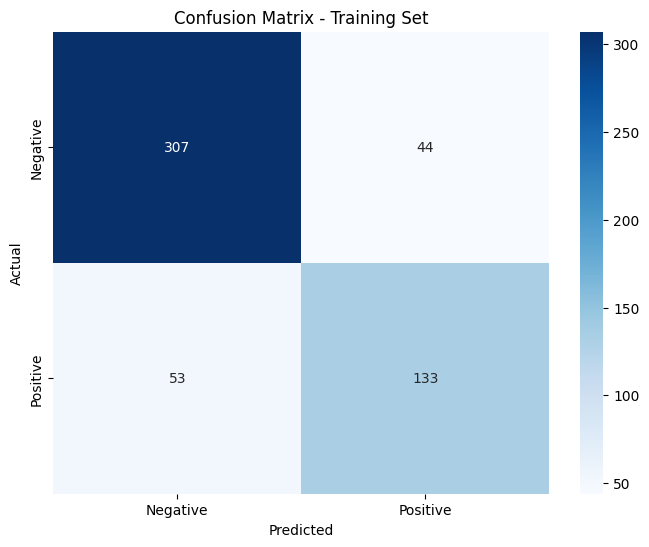

[[307  44]
 [ 53 133]]
                 precision    recall  f1-score   support

tested_negative       0.85      0.87      0.86       351
tested_positive       0.75      0.72      0.73       186

       accuracy                           0.82       537
      macro avg       0.80      0.79      0.80       537
   weighted avg       0.82      0.82      0.82       537



In [1106]:
from sklearn.metrics import classification_report,confusion_matrix

print('Training accuracy')

# Calculate the confusion matrix for the training set
cm_train = confusion_matrix(y_train, predict_train)

# Create a heatmap plot of the confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks for training set
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Show the plot for training set
plt.show()

# Confusion matrix report  for the training set
print(confusion_matrix(y_train,predict_train))

# Accuracy statistics report for the training set
print(classification_report(y_train,predict_train))


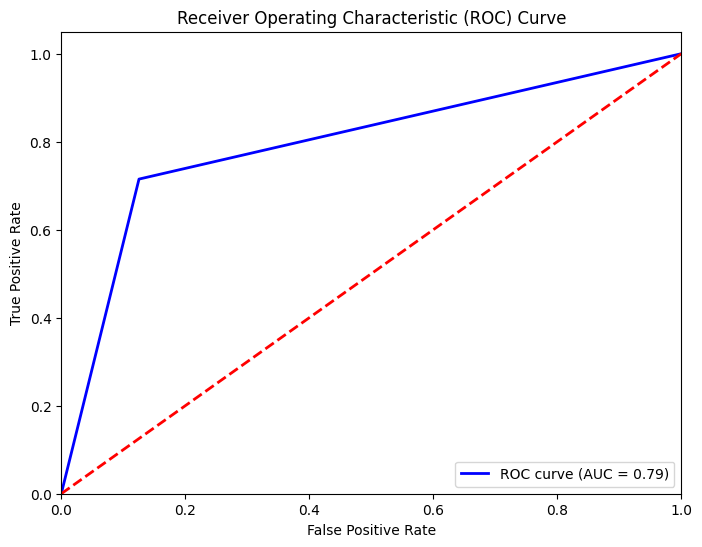

ROC AUC score: 0.7948488190423674


In [1107]:
# Importing Libraries for ROC AUC Curve and Score

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Plotting ROC Curve for Training Set

# Convert string labels to binary labels
y_train_binary = np.where(y_train == 'tested_positive', 1, 0)
predict_train_binary = np.where(predict_train == 'tested_positive', 1, 0)

# Compute the false positive rate and true positive rate for the training set
fpr, tpr, thresholds = roc_curve(y_train_binary, predict_train_binary)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_train_binary, predict_train_binary)

print("ROC AUC score:", roc_auc)

# **Testing Set Results:**

Testing accuracy


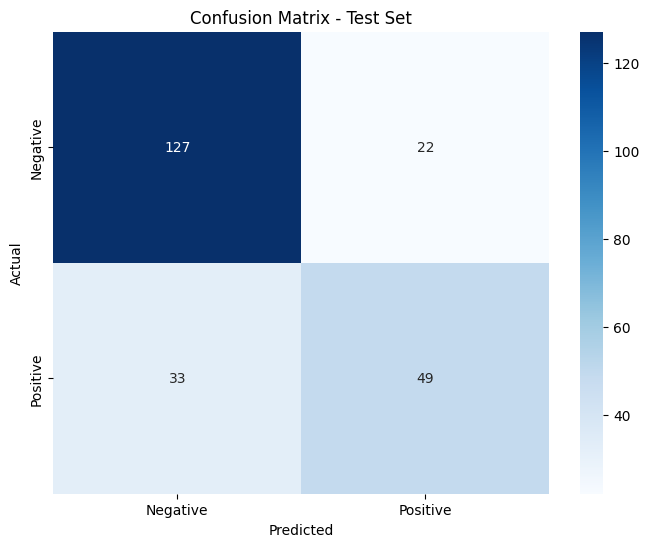

[[127  22]
 [ 33  49]]
                 precision    recall  f1-score   support

tested_negative       0.79      0.85      0.82       149
tested_positive       0.69      0.60      0.64        82

       accuracy                           0.76       231
      macro avg       0.74      0.72      0.73       231
   weighted avg       0.76      0.76      0.76       231



In [1108]:
print('Testing accuracy')

# Calculate the confusion matrix for the test set
cm_test = confusion_matrix(y_test, predict_test)

# Create a heatmap plot of the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks for test set
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Show the plot for test set
plt.show()

# Confusion matrix report for the test set
print(confusion_matrix(y_test,predict_test))

# Accuracy statistics report for the test set
print(classification_report(y_test,predict_test))

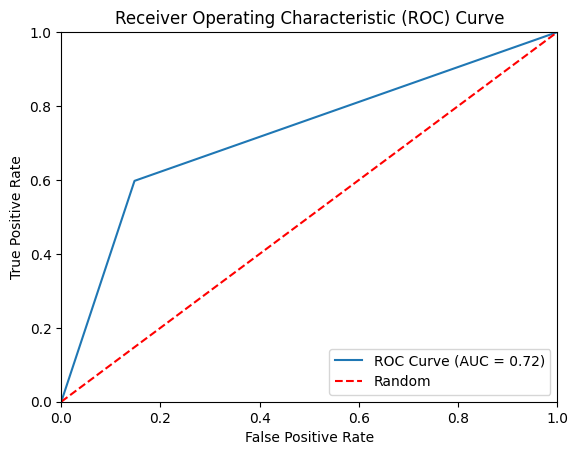

ROC AUC score: 0.7249549844491734


In [1109]:
# Plotting ROC Curve for Testing Set

# Convert string labels to binary labels
y_test_binary = np.where(y_test == 'tested_positive', 1, 0)
predict_test_binary = np.where(predict_test == 'tested_positive', 1, 0)

# Compute the false positive rate and true positive rate for the testing set
fpr, tpr, thresholds = roc_curve(y_test_binary, predict_test_binary)

# Calculate the ROC AUC score for the testing set
roc_auc = roc_auc_score(y_test_binary, predict_test_binary)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test_binary, predict_test_binary)

print("ROC AUC score:", roc_auc)